#### Build Datasets + Fit Models with diff Params
built: 5/2 4:00pm

In [1]:
import os, sys, json, copy, random, datetime
import pandas as pd
import numpy as np

# set to my fork with fix on server
sys.path.insert(0, '../../../myfastai')
# set to dev-head on local
# sys.path.insert(0, '../../../fastaif')

import fastai
print(fastai.__version__)

from fastai.vision import *
from fastai.callbacks import CSVLogger
from fastai.utils.mem import  gpu_mem_get_free_no_cache
from modules.ap3data import build_data, clear_gpu_mem
from modules.miscutils import move_file_obj
gpu_mem_get_free_no_cache()

1.0.53.dev0


6994

In [2]:
data_small = build_data(batch_size=8, 
                        size=(216, 324), 
                        valid_pct=0.2,
                        )
data_large = build_data(batch_size=8, 
                        size=(288, 432), 
                        valid_pct=0.2,
                        )

all validations pass
all validations pass


In [4]:
l1 = cnn_learner(data_small, models.resnet34)

In [5]:
l1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


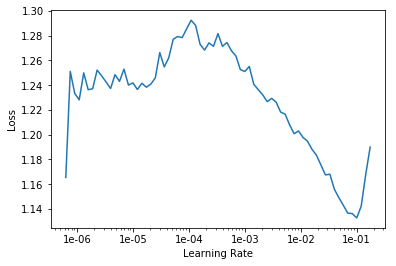

In [6]:
l1.recorder.plot()

In [1]:
'''
    5/2, 4:30pm - the "apfit2a-X" series
      - should have .csv loggers for each training episode
    
    common  -  data_large, resnet50, batchsize=8
    learn_1 -  learn splice
    learn_2 -  learn splice opposite way
    learn_3 -  constant lr (to compare against bs=16 from prev)
    learn_4 -  same as learn_1, but 20 epochs 
                (thus different lr slice at each epoch)
    learn_5 - constatn lr at 50% (1e-3 instead 2e-3) for 15 epochs
'''
pass

##### Collect models artifacts post fit (run this after models are fit)

In [ ]:
# move_file_obj(src= 'data/alphapilot/data_training/models/'
#              ,dest='new-models/'
#              ,patterns=['apfit2a', '.pth']
#              ,dry_run=False
#              )

In [ ]:
# move_file_obj(src= 'data/alphapilot/data_training/'
#              ,dest='new-models/'
#              ,patterns=['apfit2a', '.csv']
#              ,dry_run=False
#              )

##### Build & Fit Models - don't touch this subsequently, we can see history here

In [3]:
gpu_mem_get_free_no_cache()

7601

In [4]:
model_fn = 'apfit2a-1'
lr0, lr1 = 2e-4, 2e-3

learn_1 = cnn_learner(data_large, models.resnet50)

cb = CSVLogger(learn_1,filename = model_fn)

learn_1.fit_one_cycle(10, slice(lr0, lr1), callbacks=[cb])

learn_1.save(model_fn)

clear_gpu_mem(learn_1)

epoch,train_loss,valid_loss,time
0,0.602543,0.157159,02:12
1,0.071170,0.036310,02:04
2,0.050026,0.029526,02:05
3,0.030308,0.016320,02:05
4,0.023609,0.010651,02:05
5,0.019999,0.007913,02:04
6,0.017735,0.006630,02:04
7,0.016456,0.006976,02:04
8,0.015185,0.006070,02:05
9,0.016185,0.005952,02:05


6934
this Learner object self-destroyed - it still exists, but no longer usable
7130


In [5]:
model_fn = 'apfit2a-2'
lr0, lr1 = 2e-3, 2e-4

learn_2 = cnn_learner(data_large, models.resnet50)

cb = CSVLogger(learn_2,filename = model_fn)

learn_2.fit_one_cycle(10, slice(lr0, lr1), callbacks=[cb])

learn_2.save(model_fn)

clear_gpu_mem(learn_2)

epoch,train_loss,valid_loss,time
0,1.149406,0.369273,02:06
1,0.764544,0.194298,02:05
2,0.409709,0.086277,02:05
3,0.196012,0.040639,02:04
4,0.111556,0.026684,02:04
5,0.072711,0.018213,02:06
6,0.051472,0.013182,02:04
7,0.042523,0.010182,02:04
8,0.038693,0.009488,02:05
9,0.038133,0.009263,02:04


6970
this Learner object self-destroyed - it still exists, but no longer usable
7130


In [7]:
model_fn = 'apfit2a-3'

lr = 2e-3

learn_3 = cnn_learner(data_large, models.resnet50)

cb = CSVLogger(learn_3,filename = model_fn)

learn_3.fit_one_cycle(10, slice(lr), callbacks=[cb])

learn_3.save(model_fn)

clear_gpu_mem(learn_3)

epoch,train_loss,valid_loss,time
0,0.619473,0.176283,02:05
1,0.071457,0.036717,02:06
2,0.050345,0.030872,02:05
3,0.036614,0.022263,02:05
4,0.030470,0.016289,02:05
5,0.024597,0.013436,02:04
6,0.021096,0.010203,02:04
7,0.020497,0.009542,02:05
8,0.020001,0.008776,02:05
9,0.019340,0.008420,02:05


6260
this Learner object self-destroyed - it still exists, but no longer usable
6954


In [8]:
model_fn = 'apfit2a-4'
lr0, lr1 = 2e-4, 2e-3

learn_4 = cnn_learner(data_large, models.resnet50)

cb = CSVLogger(learn_4,filename = model_fn)

learn_4.fit_one_cycle(20, slice(lr0, lr1), callbacks=[cb])

learn_4.save(model_fn)

clear_gpu_mem(learn_4)

epoch,train_loss,valid_loss,time
0,0.825605,0.221602,02:06
1,0.274745,0.079597,02:05
2,0.058850,0.029170,02:05
3,0.042966,0.023534,02:05
4,0.032113,0.016860,02:05
5,0.022955,0.012214,02:05
6,0.021344,0.009416,02:05
7,0.018772,0.007139,02:06
8,0.015946,0.006660,02:05
9,0.015213,0.006106,02:05


6824
this Learner object self-destroyed - it still exists, but no longer usable
6954


In [9]:
model_fn = 'apfit2a-5'

lr = 1e-3

learn_5 = cnn_learner(data_large, models.resnet50)

cb = CSVLogger(learn_5,filename = model_fn)

learn_5.fit_one_cycle(15, slice(lr), callbacks=[cb])

learn_5.save(model_fn)

clear_gpu_mem(learn_5)

epoch,train_loss,valid_loss,time
0,0.930048,0.262455,02:05
1,0.374121,0.099961,02:04
2,0.078574,0.036230,02:05
3,0.048572,0.031115,02:06
4,0.038811,0.025114,02:05
5,0.035051,0.019851,02:05
6,0.030674,0.016029,02:05
7,0.026464,0.014425,02:05
8,0.023197,0.012245,02:05
9,0.020928,0.010008,02:05


6824
this Learner object self-destroyed - it still exists, but no longer usable
6954
